$\textbf{NOM PRENOM : FLORIAN DARGEL}$

$\textbf{Importation des packages}$ 

In [157]:
#Package utile
import pandas as pd 
import matplotlib.pyplot as plt #pour lesgraphiques
import seaborn as sns #pour les graphiques

# Question 1 - Création d'un profil de consommation 

1] Dans la base Eco2Mix, récupérer les données de consommation d’électricité (colonne
Consommation (MW)) de l’année 2017. Les données de consommation, exprimées en puissance
(MW), sont disponibles pour chaque demi-heure de l’année. Calculer l’énergie consommée en
MWh pour chaque demi-heure. Pour chaque heure de cette année, calculer la proportion de la
consommation par rapport à la consommation annuelle, de manière à obtenir un profil (en %).

$\textbf{Récuperation de la base de données de l'année 2017}$ 

In [158]:
#Importation des données
data = pd.read_csv("eco2mix-national-cons-def.csv", sep=";")
data 

C:\Users\na_to\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2015-03-04,12:00,2015-03-04T12:00:00+01:00,71330.0,71200,70400,488.0,2533.0,...,10.0,2343,2261.0,52.0,7170.0,3075.0,1173.0,520.0,209.0,200.0
1,France,Données définitives,2015-03-04,15:45,2015-03-04T15:45:00+01:00,NaN,65950,64850,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2015-03-04,16:45,2015-03-04T16:45:00+01:00,NaN,64800,63800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Données définitives,2015-03-04,17:30,2015-03-04T17:30:00+01:00,65013.0,65000,64200,484.0,2303.0,...,10.0,2315,2134.0,52.0,6616.0,2541.0,206.0,517.0,214.0,209.0
4,France,Données définitives,2015-03-04,18:00,2015-03-04T18:00:00+01:00,66140.0,66200,65700,430.0,2351.0,...,18.0,2347,2209.0,52.0,6822.0,2776.0,271.0,520.0,213.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356347,France,Données définitives,2014-09-07,14:45,2014-09-07T14:45:00+02:00,NaN,40050,40150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356348,France,Données définitives,2014-09-07,16:45,2014-09-07T16:45:00+02:00,NaN,37550,37550,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356349,France,Données définitives,2014-09-07,17:15,2014-09-07T17:15:00+02:00,NaN,37500,37500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356350,France,Données définitives,2014-09-07,19:45,2014-09-07T19:45:00+02:00,NaN,41950,41950,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
#Ranger l'heure dans l'ordre croissante
data = data.sort_values(by=["Date","Heure"])

In [160]:
data["Date et Heure"] = pd.to_datetime(data["Date et Heure"],  format="%Y-%m-%dT%H:%M:%S") 

In [161]:
#Pour avoir l'heure
data['hour'] =  data['Date et Heure'].apply(lambda x: str(x.hour))

#Pour avoir l'année 
data['year'] = data['Date et Heure'].apply(lambda x: str(x.year))

#Pour avoir le mois 
data['month'] = data['Date et Heure'].apply(lambda x: str(x.month))

#Pour le jour  
data['day'] = data['Date et Heure'].apply(lambda x: str(x.day))

In [162]:
print('les années que nous avons sont ' + str(np.unique(data['year'])))
print('les mois que nous avons sont '+ str(np.unique(data['month']))) 
print('les jours de semaines que nous avons sont' +str(np.unique(data['day'])))

les années que nous avons sont ['2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021'
 '2022']
les mois que nous avons sont ['1' '10' '11' '12' '2' '3' '4' '5' '6' '7' '8' '9']
les jours de semaines que nous avons sont['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '4' '5' '6' '7' '8' '9']


In [163]:
#année 2017 
data = data[data["year"] == "2017"]

$\textbf{Energie consommé en MWh pour chaque demi-heure}$ 

le mégawattheure indique la quantité d'énergie produite et distribuée en une heure par un mégawatt. On souhaite pour chaque demi-heure on va donc $\underline{multiplié \; la \; consommation \; par \; 0.5}$

In [164]:
data.isnull().sum()

Périmètre                                        0
Nature                                           0
Date                                             0
Heure                                            0
Date et Heure                                    0
Consommation (MW)                            17520
Prévision J-1 (MW)                               0
Prévision J (MW)                                 0
Fioul (MW)                                   17520
Charbon (MW)                                 17520
Gaz (MW)                                     17520
Nucléaire (MW)                               17520
Eolien (MW)                                  17520
Solaire (MW)                                 17520
Hydraulique (MW)                             17520
Pompage (MW)                                 17520
Bioénergies (MW)                             17520
Ech. physiques (MW)                          17520
Taux de CO2 (g/kWh)                          17520
Ech. comm. Angleterre (MW)     

Pour l'année 2017, on en a plus de 17520 valeurs manquante sur la consommation, les valeurs manquantes sont les quart d'heures, on va les supprimer car ce qui nous interesse est l'information pour chaque demi heure.

In [165]:
#Supression valeur manquante consommation
data = data[data['Consommation (MW)'].notna()]
data 

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW),hour,year,month,day
243544,France,Données définitives,2017-01-01,00:00,2017-01-01 00:00:00+01:00,76259.0,76100,76500,164.0,1579.0,...,2592.0,3454.0,498.0,559.0,286.0,245.0,0,2017,1,1
265662,France,Données définitives,2017-01-01,00:30,2017-01-01 00:30:00+01:00,74981.0,74900,75100,601.0,1506.0,...,2717.0,3671.0,533.0,559.0,285.0,256.0,0,2017,1,1
265663,France,Données définitives,2017-01-01,01:00,2017-01-01 01:00:00+01:00,72912.0,73400,73400,596.0,1291.0,...,2661.0,2522.0,385.0,556.0,283.0,252.0,1,2017,1,1
243546,France,Données définitives,2017-01-01,01:30,2017-01-01 01:30:00+01:00,72682.0,73900,73900,587.0,1028.0,...,2537.0,2452.0,427.0,558.0,285.0,256.0,1,2017,1,1
5518,France,Données définitives,2017-01-01,02:00,2017-01-01 02:00:00+01:00,72166.0,73300,73300,599.0,1024.0,...,2426.0,2387.0,272.0,560.0,285.0,255.0,2,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136010,France,Données définitives,2017-12-31,21:30,2017-12-31 21:30:00+01:00,56739.0,53500,53300,164.0,34.0,...,5712.0,990.0,376.0,583.0,285.0,281.0,21,2017,12,31
136011,France,Données définitives,2017-12-31,22:00,2017-12-31 22:00:00+01:00,56233.0,53000,52800,164.0,34.0,...,5748.0,1009.0,0.0,586.0,296.0,281.0,22,2017,12,31
133235,France,Données définitives,2017-12-31,22:30,2017-12-31 22:30:00+01:00,57239.0,54700,54500,164.0,37.0,...,5769.0,1075.0,2.0,592.0,299.0,280.0,22,2017,12,31
14595,France,Données définitives,2017-12-31,23:00,2017-12-31 23:00:00+01:00,60642.0,57300,57100,164.0,37.0,...,6003.0,1906.0,444.0,591.0,291.0,279.0,23,2017,12,31


In [166]:
data["energie"] = 0.5 * data['Consommation (MW)']

In [167]:
data 

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW),hour,year,month,day,energie
243544,France,Données définitives,2017-01-01,00:00,2017-01-01 00:00:00+01:00,76259.0,76100,76500,164.0,1579.0,...,3454.0,498.0,559.0,286.0,245.0,0,2017,1,1,38129.5
265662,France,Données définitives,2017-01-01,00:30,2017-01-01 00:30:00+01:00,74981.0,74900,75100,601.0,1506.0,...,3671.0,533.0,559.0,285.0,256.0,0,2017,1,1,37490.5
265663,France,Données définitives,2017-01-01,01:00,2017-01-01 01:00:00+01:00,72912.0,73400,73400,596.0,1291.0,...,2522.0,385.0,556.0,283.0,252.0,1,2017,1,1,36456.0
243546,France,Données définitives,2017-01-01,01:30,2017-01-01 01:30:00+01:00,72682.0,73900,73900,587.0,1028.0,...,2452.0,427.0,558.0,285.0,256.0,1,2017,1,1,36341.0
5518,France,Données définitives,2017-01-01,02:00,2017-01-01 02:00:00+01:00,72166.0,73300,73300,599.0,1024.0,...,2387.0,272.0,560.0,285.0,255.0,2,2017,1,1,36083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136010,France,Données définitives,2017-12-31,21:30,2017-12-31 21:30:00+01:00,56739.0,53500,53300,164.0,34.0,...,990.0,376.0,583.0,285.0,281.0,21,2017,12,31,28369.5
136011,France,Données définitives,2017-12-31,22:00,2017-12-31 22:00:00+01:00,56233.0,53000,52800,164.0,34.0,...,1009.0,0.0,586.0,296.0,281.0,22,2017,12,31,28116.5
133235,France,Données définitives,2017-12-31,22:30,2017-12-31 22:30:00+01:00,57239.0,54700,54500,164.0,37.0,...,1075.0,2.0,592.0,299.0,280.0,22,2017,12,31,28619.5
14595,France,Données définitives,2017-12-31,23:00,2017-12-31 23:00:00+01:00,60642.0,57300,57100,164.0,37.0,...,1906.0,444.0,591.0,291.0,279.0,23,2017,12,31,30321.0


Pour chaque heure de cette année, calculer la proportion de la consommation par rapport à la consommation annuelle, de manière à obtenir un profil (en %).

In [168]:
data_bis=data.groupby(['Date','hour'])['energie'].sum().to_frame().reset_index()
energie_total=data_bis['energie'].sum()
print('La consommation total de 2017 en MW',energie_total)
data_bis['Profil(%)']=data_bis['energie']/energie_total
data_bis 

La consommation total de 2017 en MW 479044647.5


,Date,hour,energie,Profil(%)
0,2017-01-01,0,75620.0,0.000158
1,2017-01-01,1,72797.0,0.000152
2,2017-01-01,10,66820.0,0.000139
3,2017-01-01,11,68446.0,0.000143
4,2017-01-01,12,70100.5,0.000146
...,...,...,...,...
8754,2017-12-31,5,48121.5,0.000100
8755,2017-12-31,6,49192.0,0.000103
8756,2017-12-31,7,50500.0,0.000105
8757,2017-12-31,8,52101.0,0.000109


In [169]:
#Exportation du fichier en format csv
data_bis.to_csv('q1_1.csv')

On a calculé l'énergie consommé en MWH pour chaque demi-heure (présent dans la colonne energie)

## Appliquer ce profil à une consommation d’électricité annuelle de 600 TWh, de manière à obtenir pour chaque heure de cette année une consommation (en TWh).

On a 600 TWh = 600 000 000 MWh

In [170]:
data_bis['conso_600']=data_bis['Profil(%)'] * 600000000 #on exprime la consommation en MWH
data_bis

,Date,hour,energie,Profil(%),conso_600
0,2017-01-01,0,75620.0,0.000158,94713.509976
1,2017-01-01,1,72797.0,0.000152,91177.722636
2,2017-01-01,10,66820.0,0.000139,83691.572819
3,2017-01-01,11,68446.0,0.000143,85728.126208
4,2017-01-01,12,70100.5,0.000146,87800.375642
...,...,...,...,...,...
8754,2017-12-31,5,48121.5,0.000100,60271.835101
8755,2017-12-31,6,49192.0,0.000103,61612.628706
8756,2017-12-31,7,50500.0,0.000105,63250.889365
8757,2017-12-31,8,52101.0,0.000109,65256.130432


In [54]:
#Exportation du fichier en format csv
data_bis.to_csv('q1_2.csv')

## Quelles variations de consommation peut-on observer à différentes granularités temporelles (journée, semaine, mois, année) ? Pouvez-vous expliquer ces variations ? 

On observe que la consommation est moins elevée vers la moitié du l'année c'est à dire vers le mois de mai, juin, juillet, août. L'energie est plus consommé dans les période hivernale en métropole (gaz et electricité).

In [171]:
data_bis['month'] = pd.DatetimeIndex(data_bis['Date']).month #selectionne les mois
data_bis['day'] = pd.DatetimeIndex(data_bis['Date']).day #selectionne les jours sur 1 mois
data_bis ['day_week'] = pd.DatetimeIndex(data_bis['Date']).dayofweek #selectonne les jours sur 1 semaine
data_bis ['week'] = pd.DatetimeIndex(data_bis['Date']).week
data_bis

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


,Date,hour,energie,Profil(%),conso_600,month,day,day_week,week
0,2017-01-01,0,75620.0,0.000158,94713.509976,1,1,6,52
1,2017-01-01,1,72797.0,0.000152,91177.722636,1,1,6,52
2,2017-01-01,10,66820.0,0.000139,83691.572819,1,1,6,52
3,2017-01-01,11,68446.0,0.000143,85728.126208,1,1,6,52
4,2017-01-01,12,70100.5,0.000146,87800.375642,1,1,6,52
...,...,...,...,...,...,...,...,...,...
8754,2017-12-31,5,48121.5,0.000100,60271.835101,12,31,6,52
8755,2017-12-31,6,49192.0,0.000103,61612.628706,12,31,6,52
8756,2017-12-31,7,50500.0,0.000105,63250.889365,12,31,6,52
8757,2017-12-31,8,52101.0,0.000109,65256.130432,12,31,6,52


$\textbf{Sur les jours de semaine}$

[Text(0.5, 1.0, "Sur l'année")]

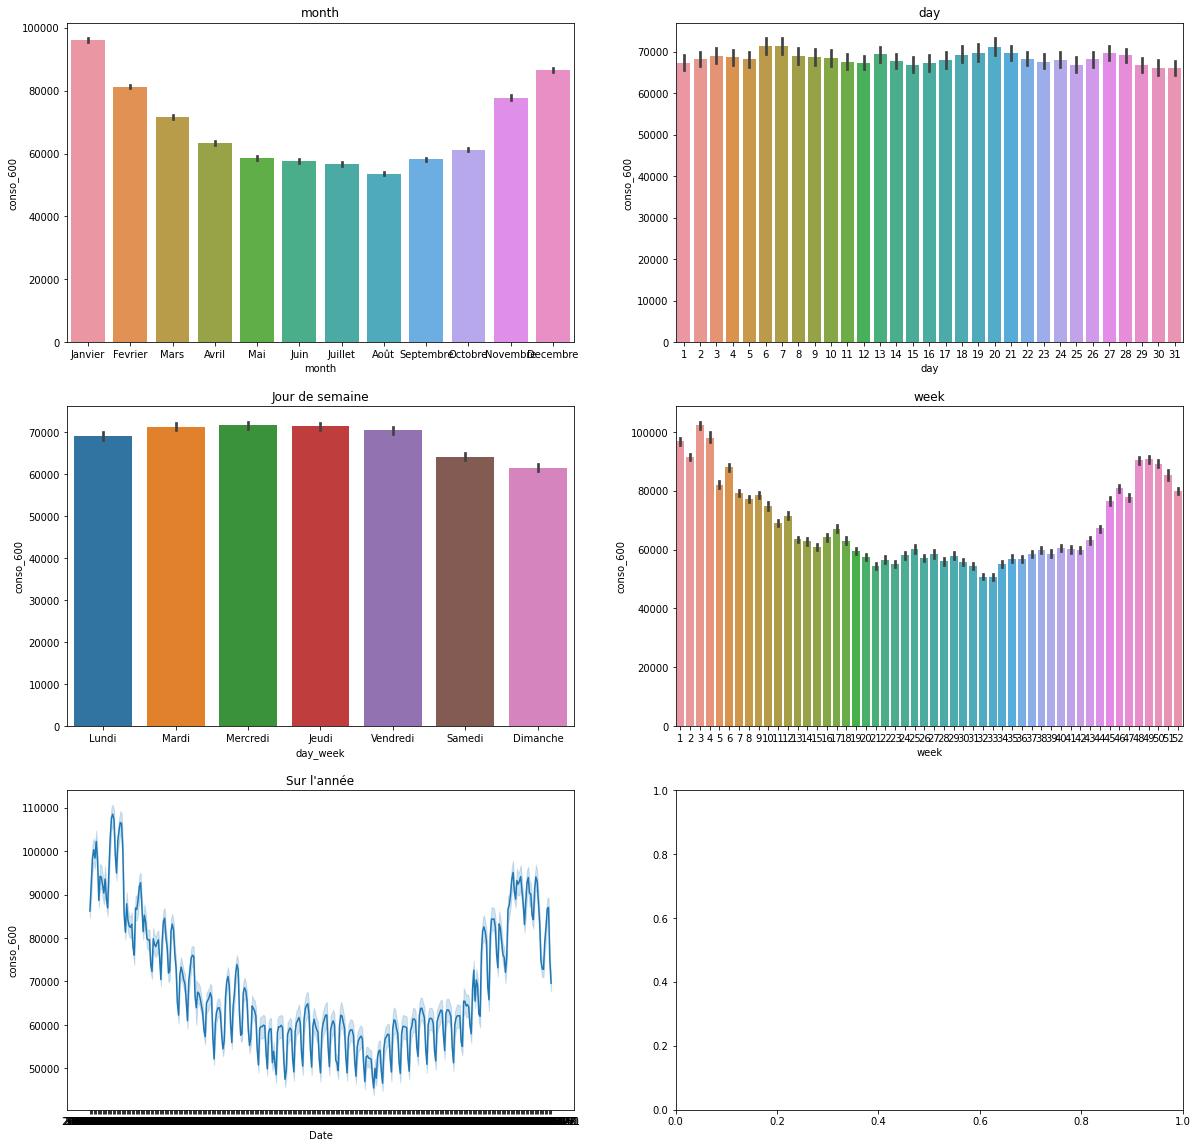

In [56]:
figure, ((ax1,ax2), (ax3,ax4), (ax5,ax6) ) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(20,20)
#sur les mois 
x_month_list = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Decembre']
sns.barplot(data=data_bis, x="month", y="conso_600", ax=ax1)
ax1.set(title = "month")
ax1.set_xticklabels(x_month_list)

#sur les jours (365)
sns.barplot(data=data_bis, x="day", y="conso_600", ax=ax2)
ax2.set(title = "day")

#sur les jours de semaines
x_dayweek_list = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
sns.barplot(data=data_bis, x="day_week", y="conso_600",ax=ax3)
ax3.set(title = "Jour de semaine")
ax3.set_xticklabels(x_dayweek_list)

#pour chaque semaines (1 à 52)
sns.barplot(data=data_bis, x="week", y="conso_600", ax=ax4)
ax4.set(title = "week")

#sur l'année 2017
sns.lineplot(data=data_bis, x="Date", y="conso_600",ax=ax5)
ax5.set(title = "Sur l'année")

En analysant l'ensemble des graphiques, on observe que  la consommation d’électricité en été change par rapport à celle observée l’hiver. Notamment, en raison des vacances, de la non-utilisation du chauffage, de la diminution d’utilisation de l’éclairage… La demande en électricité est donc plus faible en hiver. Néanmoins, plus la température augmente en été, plus le besoin en électricité augmente également. En effet, plus il fait chaud, plus les gens utilisent la ventilation et la climatisation. Mais la consommation n'est pas très importante par rapport en hiver. En hiver, la consommation d’électricité est beaucoup plus importante qu’en été, notamment, avec l’utilisation plus importante et plus longue des chauffages et des lampes.

$\textbf{Sur l'année 2017}$ 

    Lorsqu'on observe les consommations sur chaque jour on observe des oscilations de consommation  qui decroient du début de l'année jusqu'à la moitié de l'année puis qui devient croissant de la moitié de l'année jusqu'à la fin de l'année. 



$\textbf{Sur les mois}$ (Janvier, Fevrier, Mars, Avril, Mai, Juin, Juillet, Août, Septembre, Octobre, Novembre, Decembre

    On observe que la consommation est moins elevée vers la moitié du l'année c'est à dire vers le mois de mai, juin, juillet, août. L'energie est plus consommé dans les période hivernale en métropole (gaz et electricité).

$\textbf{Sur les jours de semaines} (Lundi, mardi, mercredi, jeudi, vendredi, samedi, dimanche)$ 

    On observe que la consommation est moins important le week-end que en jour de semaine (le dimanche reste le jour où l'on consomme le moins). La grande majorité des entreprises sont fermées le dimanche, c'est une des raisons qu'il y ait moins de consommation. Les gens peuvent aussi réaliser des activés à l'exterieur que de rester chez soit et consommé de l'électricité.

$\textbf{Sur les jours du mois}$ 
    
    On observe pas de grande différence, sur un mois, la différence de  consommation ne varie pas beaucoup 

# Question 2 – Création de profils de production renouvelable 

## Dans la base Eco2Mix, récupérer les données de production d’électricité éolienne (colonne Eolien (MW)) et solaire (colonne Solaire (MW)) de 2017. Les données de production sont exprimées en puissance pour chaque demi-heure. Calculer l’énergie produite, en MWh, pour chaque heure de l’année.

$\textbf{Récupération les données de production d’électricité éolienne (colonne Eolien (MW)) et solaire (colonne Solaire (MW)) de 2017}$ 

In [172]:
data_parc = pd.read_csv("parc-prod-par-filiere.csv", sep=";")
data_eco = pd.read_csv("eco2mix-national-cons-def.csv", sep=";")
#data_parc = data_parc[['Annee','Parc eolien (MW)','Parc solaire (MW)']]
#data_parc = data_parc[data_parc["Annee"] == "2017"]
#data_parc

C:\Users\na_to\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [173]:
#trie dans l'ordre croissant la date et l'heure
data_eco = data_eco.sort_values(by = ['Date','Heure'])

In [174]:
data_eco=data_eco[['Date','Heure','Date et Heure','Eolien (MW)','Solaire (MW)']]
data_eco

,Date,Heure,Date et Heure,Eolien (MW),Solaire (MW)
97574,2012-01-01,00:00,2012-01-01T00:00:00+01:00,3588.0,0.0
141213,2012-01-01,00:15,2012-01-01T00:15:00+01:00,NaN,NaN
325784,2012-01-01,00:30,2012-01-01T00:30:00+01:00,3588.0,0.0
325787,2012-01-01,00:45,2012-01-01T00:45:00+01:00,NaN,NaN
325790,2012-01-01,01:00,2012-01-01T01:00:00+01:00,3536.0,0.0
...,...,...,...,...,...
255921,2022-02-28,22:45,2022-02-28T22:45:00+01:00,NaN,NaN
5969,2022-02-28,23:00,2022-02-28T23:00:00+01:00,3487.0,2.0
255922,2022-02-28,23:15,2022-02-28T23:15:00+01:00,NaN,NaN
255923,2022-02-28,23:30,2022-02-28T23:30:00+01:00,3345.0,2.0


In [175]:
#Supression valeur manquante consommation
data_eco = data_eco[data_eco['Eolien (MW)'].notna()]

In [176]:
data_eco.isnull().sum()

Date             0
Heure            0
Date et Heure    0
Eolien (MW)      0
Solaire (MW)     0
dtype: int64

On observe qu'on en a plus de valeur manquante

In [177]:
data_eco["Date et Heure"] = pd.to_datetime(data_eco["Date et Heure"],  format="%Y-%m-%dT%H:%M:%S") 

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
#Pour créer une colonne année 
data_eco['year'] = data_eco['Date et Heure'].apply(lambda x: str(x.year))

#Pour avoir l'heure
data_eco['hour'] =  data_eco['Date et Heure'].apply(lambda x: str(x.hour))

#Pour avoir l'année 2017 
data_eco = data_eco[data_eco["year"] == "2017"] 
data_eco 

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Heure,Date et Heure,Eolien (MW),Solaire (MW),year,hour
243544,2017-01-01,00:00,2017-01-01 00:00:00+01:00,267.0,-1.0,2017,0
265662,2017-01-01,00:30,2017-01-01 00:30:00+01:00,311.0,-1.0,2017,0
265663,2017-01-01,01:00,2017-01-01 01:00:00+01:00,351.0,-1.0,2017,1
243546,2017-01-01,01:30,2017-01-01 01:30:00+01:00,367.0,-1.0,2017,1
5518,2017-01-01,02:00,2017-01-01 02:00:00+01:00,360.0,-1.0,2017,2
...,...,...,...,...,...,...,...
136010,2017-12-31,21:30,2017-12-31 21:30:00+01:00,10775.0,-1.0,2017,21
136011,2017-12-31,22:00,2017-12-31 22:00:00+01:00,10797.0,-1.0,2017,22
133235,2017-12-31,22:30,2017-12-31 22:30:00+01:00,10698.0,-1.0,2017,22
14595,2017-12-31,23:00,2017-12-31 23:00:00+01:00,10712.0,-1.0,2017,23


$\textbf{On calcule l’énergie produite, en MWh, pour chaque heure de l’année.}$

In [179]:
data_eco["energie_solaire"] = 0.5 * data_eco['Solaire (MW)']
data_eco["energie_eolien"] = 0.5 * data_eco['Eolien (MW)']

In [180]:
data_eco_solaire=data_eco.groupby(['Date','hour'])['energie_solaire'].sum().to_frame().reset_index()
data_eco_solaire 

,Date,hour,energie_solaire
0,2017-01-01,0,-1.0
1,2017-01-01,1,-1.0
2,2017-01-01,10,623.5
3,2017-01-01,11,1077.5
4,2017-01-01,12,1355.0
...,...,...,...
8754,2017-12-31,5,-1.0
8755,2017-12-31,6,-1.0
8756,2017-12-31,7,-1.0
8757,2017-12-31,8,2.5


In [181]:
data_eco_eolien=data_eco.groupby(['Date','hour'])['energie_eolien'].sum().to_frame().reset_index()
data_eco_eolien 

,Date,hour,energie_eolien
0,2017-01-01,0,289.0
1,2017-01-01,1,359.0
2,2017-01-01,10,617.5
3,2017-01-01,11,655.5
4,2017-01-01,12,715.5
...,...,...,...
8754,2017-12-31,5,9515.5
8755,2017-12-31,6,9369.5
8756,2017-12-31,7,9373.0
8757,2017-12-31,8,9701.5


In [182]:
#Regroupement sur une table 
data_sol_eol = data_eco_eolien.join(data_eco_solaire['energie_solaire'])
data_sol_eol

,Date,hour,energie_eolien,energie_solaire
0,2017-01-01,0,289.0,-1.0
1,2017-01-01,1,359.0,-1.0
2,2017-01-01,10,617.5,623.5
3,2017-01-01,11,655.5,1077.5
4,2017-01-01,12,715.5,1355.0
...,...,...,...,...
8754,2017-12-31,5,9515.5,-1.0
8755,2017-12-31,6,9369.5,-1.0
8756,2017-12-31,7,9373.0,-1.0
8757,2017-12-31,8,9701.5,2.5


In [68]:
#Exportation du fichier en format csv
data_sol_eol.to_csv('q2_1.csv')

## Dans la base du parc national annuel, récupérer les puissances installées (colonnes Parc eolien (MW) et Parc solaire (MW)) au 31 décembre 2016. Calculer l’énergie maximum pouvant être produite pendant 1 h, en MWh.

In [183]:
#On récupére l'année 31 décembre 2016
data_parc = data_parc[data_parc["Annee"]==2016]
data_parc = data_parc[['Parc eolien (MW)','Parc solaire (MW)']] 
data_parc.rename(index={2: '2016'})

,Parc eolien (MW),Parc solaire (MW)
2016,11761.4,6772.5


Energie maximum pouvant être produite pendant 1h, en MWh:
        
        Pour l'eolien : 11 761 x 1 = 11761 MWh
        Pour le solaire : 6772.5 x 1 = 6772.5 MWh

In [70]:
#Exportation du fichier en format csv
data_parc.to_csv('q2_2.csv')

## Pour chaque heure de 2017, calculer la proportion de la production par rapport à la production maximum

In [184]:
data_sol_eol['eolien(proportion_production)']  = (data_sol_eol['energie_eolien'] / data_parc['Parc eolien (MW)'].values)
data_sol_eol['solaire(proportion_production)']  = (data_sol_eol['energie_solaire'] / data_parc['Parc solaire (MW)'].values) 
data_sol_eol

,Date,hour,energie_eolien,energie_solaire,eolien(proportion_production),solaire(proportion_production)
0,2017-01-01,0,289.0,-1.0,0.024572,-0.000148
1,2017-01-01,1,359.0,-1.0,0.030524,-0.000148
2,2017-01-01,10,617.5,623.5,0.052502,0.092063
3,2017-01-01,11,655.5,1077.5,0.055733,0.159099
4,2017-01-01,12,715.5,1355.0,0.060835,0.200074
...,...,...,...,...,...,...
8754,2017-12-31,5,9515.5,-1.0,0.809045,-0.000148
8755,2017-12-31,6,9369.5,-1.0,0.796631,-0.000148
8756,2017-12-31,7,9373.0,-1.0,0.796929,-0.000148
8757,2017-12-31,8,9701.5,2.5,0.824859,0.000369


In [72]:
#Exportation du fichier en format csv
data_sol_eol.to_csv('q2_3.csv')

## Quelles variations de production peut-on observer à différentes granularités temporelles (journée, semaine, mois, année) ? Pouvez-vous expliquer ces variations ?

In [185]:
data_sol_eol['month'] = pd.DatetimeIndex(data_sol_eol['Date']).month
data_sol_eol['day'] = pd.DatetimeIndex(data_sol_eol['Date']).day
data_sol_eol['day_week'] = pd.DatetimeIndex(data_sol_eol['Date']).dayofweek
data_sol_eol['week'] = pd.DatetimeIndex(data_sol_eol['Date']).week
data_sol_eol

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


,Date,hour,energie_eolien,energie_solaire,eolien(proportion_production),solaire(proportion_production),month,day,day_week,week
0,2017-01-01,0,289.0,-1.0,0.024572,-0.000148,1,1,6,52
1,2017-01-01,1,359.0,-1.0,0.030524,-0.000148,1,1,6,52
2,2017-01-01,10,617.5,623.5,0.052502,0.092063,1,1,6,52
3,2017-01-01,11,655.5,1077.5,0.055733,0.159099,1,1,6,52
4,2017-01-01,12,715.5,1355.0,0.060835,0.200074,1,1,6,52
...,...,...,...,...,...,...,...,...,...,...
8754,2017-12-31,5,9515.5,-1.0,0.809045,-0.000148,12,31,6,52
8755,2017-12-31,6,9369.5,-1.0,0.796631,-0.000148,12,31,6,52
8756,2017-12-31,7,9373.0,-1.0,0.796929,-0.000148,12,31,6,52
8757,2017-12-31,8,9701.5,2.5,0.824859,0.000369,12,31,6,52


Text(0, 0.5, 'Profils de production')

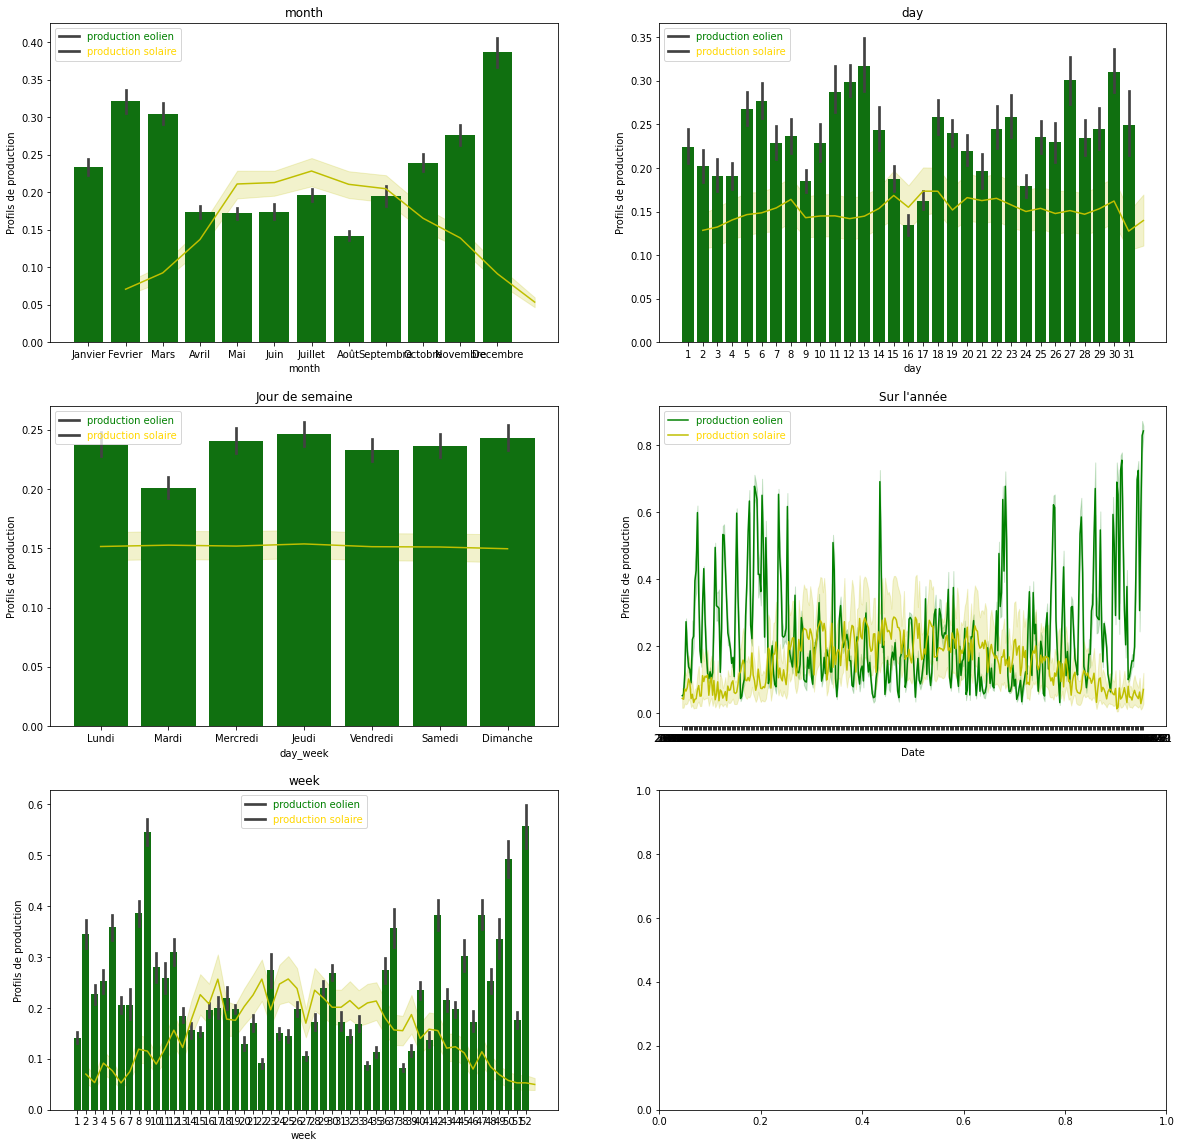

In [74]:
figure, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(20,20)
#sur les mois 
sns.barplot(data=data_sol_eol, x="month", y='eolien(proportion_production)', ax=ax1, color="g")
sns.lineplot(data=data_sol_eol, x="month", y='solaire(proportion_production)', ax=ax1, color="y")
ax1.set(title = "month")
ax1.legend(labels=["production eolien","production solaire"], labelcolor= ["green","gold"])
ax1.set_xticklabels(x_month_list)
ax1.set_ylabel("Profils de production",)

#sur les jours 
sns.barplot(data=data_sol_eol, x="day", y='eolien(proportion_production)',ax=ax2, color="g")
sns.lineplot(data=data_sol_eol, x="day", y='solaire(proportion_production)',ax=ax2, color="y")
ax2.set(title = "day")
ax2.legend(labels=["production eolien","production solaire"])
ax2.legend(labels=["production eolien","production solaire"], labelcolor= ["green","gold"])
ax2.set_ylabel("Profils de production",)

#sur les jours de semaines
#x_dayweek_list = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
sns.barplot(data=data_sol_eol, x="day_week", y='eolien(proportion_production)',ax=ax3, color="g")
sns.lineplot(data=data_sol_eol, x="day_week", y='solaire(proportion_production)',ax=ax3, color="y")
ax3.set(title = "Jour de semaine")
ax3.legend(labels=["production eolien","production solaire"])
ax3.legend(labels=["production eolien","production solaire"], labelcolor= ["green","gold"])
ax3.set_xticklabels(x_dayweek_list)
ax3.set_ylabel("Profils de production",)

#sur l'année
sns.lineplot(data=data_sol_eol, x="Date", y='eolien(proportion_production)', ax=ax4,  color="g")
sns.lineplot(data=data_sol_eol, x="Date", y='solaire(proportion_production)', ax=ax4, color="y")
ax4.set(title = "Sur l'année")
ax4.legend(labels=["production eolien","production solaire"])
ax4.legend(labels=["production eolien","production solaire"], labelcolor= ["green","gold"])
ax4.set_ylabel("Profils de production",)

#sur les semaines
sns.barplot(data=data_sol_eol, x="week", y='eolien(proportion_production)', ax=ax5,  color="g")
sns.lineplot(data=data_sol_eol, x="week", y='solaire(proportion_production)', ax=ax5, color="y")
ax5.set(title = "week")
ax5.legend(labels=["production eolien","production solaire"])
ax5.legend(labels=["production eolien","production solaire"], labelcolor= ["green","gold"])
ax5.set_ylabel("Profils de production",)

Pour les productions solaires 

    On a une production renouvelable plus importante de mai à septembre. Cela vient du fait qu’il s’agit de l’été,
    on a donc plus d’ensoleillement durant cette periode en métropole. En tout cas on en a moins de consommation
    durant cette periode. Sur la semaine (lundi à dimanche) la production est stable.
    
Pour les productions éoliens
    
    On a une production renouvelable plus importante de novembre à fevrier. Cela vient du fait qu'on a probablement plus de vent durant cette période. On a aussi des eoliens en mer qui peuvent recevoir des vents plus forts et plus réguliers que le terrestre. Par contre le mardi, la production est moins importante comparé aux autres jours, il doit probablement avoir une maintenance pour le mardi.

## Comparez les profils de production renouvelable et les profils de consommation. Que pouvez-vous en dire 

Les énergies renouvelables participent à la couverture de la consommation d’électricité. L’objectif étant avoir
une baisse de la consommation et une augmentation sur la production d’énergies renouvelables en déterminant
un mix électrique neutre en carbone, à l’horizon 2050. On observe que l’energie solaire étant importante en
été peut couvrir une grande partie de la consommation d’éléctricité (la consommation est basse durant cette
période), une quantité plus importante d’energie solaire est stocké durant cette période. En hiver c’est plutôt
l’éolien qui obtient une quantité plus importante d’energie grâce aux vents qui peut couvrir une grande partie
de la consommation d’électricité où la consommation est plus elevée en hiver.

L’energie solaire qui a été stocké en été peut être utilisé durant la période hivernale. En cas de rupture, il
y a toujours l’eolien qui est présent. L’objectif est d’atteindre un pourcentage élevé d’énergies renouvelables
dans la consommation totale d’énergie de la France à horizon 2050.

# Question 3

1] Modéliser le problème sous forme d’un programme linéaire. L’objectif de ce programme linéaire
est de minimiser la somme des coûts d’investissement et des coûts opérationnels du système. La
consommation de chaque heure de la journée doit être satisfaite dans la mesure du possible par
la production des différents actifs. L’équation doit également tenir compte des délestages ou des
excès de production éventuels. La production horaire de chaque actif ne peut pas dépasser sa
production horaire maximum. Pour les actifs éoliens et solaires, la production horaire est fixée par
le produit entre la production horaire maximum et le profil déterminé dans la question 2.

$\textbf{Modélisons le problème sous forme d’un programme linéaire.}$ 

Fonction objective : ${\min 70000 c_1 + 50000 c_2 + 60000c_3 + 150 g_{i} + 3000 e_{i} + 1000 d_{i}}$ 

Contrainte 1 : $c_1 \times  profil1_i +  c_2 \times  profil2_i + g_i + d_i - e_i = conso_i$ 

Contrainte 2 : $g_i \leq c_3$

contrainte 3 : $c_1 \geq 0$ 

contrainte 4 : $c_2 \geq 0$ 

contrainte 5 : $c_3 \geq 0$ 

contrainte 6 : $g_i \geq 0$

contrainte 7 : $e_i \geq 0$ 

contrainte 8 : $d_i \geq 0$


$c_1$ : capacité éolien | $c_2$ : capacité solaire  | $c_3$ : capacité biogaz |  $g_i$ : la production d'electricité par biogaz en heure pour un scénario de 600TWH | $d_i$ : le délestages

$e_i$ : excés de production 

$\textbf{2] Coder et résoudre ce programme linéaire. Comment est composé le mix électrique obtenu ?}$ $\textbf{Observe-t-on des délestages ou des excès de production ?}$ $\textbf{Combien d’heures et en quelle quantité ?}$

In [ ]:
fonction_obj = "70000c1 + 50000c2 + 60000c3"
for i in range(0,data_sol_eol.shape[0]-1):
    fonction_obj = fonction_obj + " + 150g_" + str(i) + "+" + " 1000e_" + str(i) + "+" + " 3000d_" + str(i) #ecriture de la fonction objective

#Ecriture de la fonction  objective
filename ='question3.lp'
with open(filename, 'a', encoding='latin-1') as f:
    f.write("Minimize\n")
    f.write('fonction_objective:') #ecriture de la fonction objective 
    f.write(fonction_obj)
    f.write("\nSubject To \n") #utilisation des contraintes pour la suite
    f.close()
    
#Pour la première contrainte 
for i in range(0,data_sol_eol.shape[0]-1):
    if data_sol_eol['solaire(proportion_production)'][i] < 0: #car on a des energie solaire negatives
        contrainte1 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 ' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + g_' + str(i) + '+d_' + str(i) + '-e_' + str(i) + '=' +str(data_bis['conso_600'][i]) + '\n'       
    else: 
        contrainte1 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 +' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + g_' + str(i) + '+d_' + str(i) + '-e_' + str(i) + '=' +str(data_bis['conso_600'][i]) + '\n' 
    with open(filename, 'a',encoding='latin-1') as f:
        f.write(contrainte1)
        f.close
    
#Pour la deuxième contrainte
for i in range(0,data_sol_eol.shape[0]-1):
    contrainte2 = 'g_' + str(i) + '-c3 <= 0' + '\n'  
    with open(filename, 'a', encoding='latin-1') as f:
        f.write(contrainte2)
        f.close()   
        
##Pour les bounds : 
with open(filename, 'a', encoding='latin-1') as f:
    f.write("bounds\n")
    f.close()

        
#Pour les contraintes 6,7,8
for i in range(0,data_sol_eol.shape[0]-1):
    bounds = 'd_'+str(i)+'>=0' + '\n' + 'e_'+str(i)+'>=0' + '\n' + 'g_'+str(i)+'>=0' + '\n'
    with open(filename, 'a', encoding='latin-1') as f:
        f.write(bounds)
        f.close()
        
#Pour les contraintes c1, c2, c3        
bounds2 = 'c1 >=0' + '\n' + 'c2>=0' + '\n' + 'c3>=0' + '\n'  
with open(filename, 'a', encoding='latin-1') as f:  
    f.write(bounds2)
    f.write('END')
    f.close()

Voici quelques résultats obtenus après avoir résolu notre programme linéaire avec CPLEX

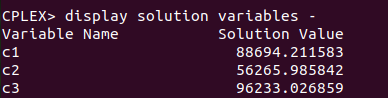

In [186]:
from PIL import Image
im = Image.open('cplex.png')
im

Le mix électrique désigne les sources d’énergie utilisées dans la production d’électricité d’un pays. Leur utilisation se fait en proportions différentes. 

    Le mix électrique avec les valeurs de capacités optimales sont : 
        c1 (éolien) = 88694
        c2 (solaire) = 56265
        c3 (CCGT) = 96233

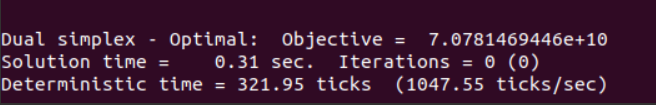

In [187]:
im2 = Image.open('cplex_cout.png')
im2

En affichant le résultat de la fonction objective, on obtient un côut en euro d'environ $7,07 x 10^{10}$

Après avoir exporter le modèle en format XML sur cplex on importe notre fichier sur python

In [188]:
from bs4 import BeautifulSoup 

with open('solution3', 'r') as f: 
    data = f.read() 
#data

In [189]:
Bs_data = BeautifulSoup(data, "xml") 
#Bs_data

In [190]:
b_name = Bs_data.find("header")
value = b_name.get('objectiveValue')
print("la valeur de la fonction objective est égale à " + str(value))

la valeur de la fonction objective est égale à 70781469446.144196


In [191]:
c_name = Bs_data.find("variables")
#print(c_name)

In [192]:
test = c_name.find_all('variable')

In [193]:
variables = []
valeurs = []
for i in range(0,len(test)-1):
    test_1 = test[i]
    a = test_1.get('name')
    b = test_1.get('value')
    variables.append(a)
    valeurs.append(b)

In [194]:
df = pd.DataFrame(columns = ['variables' , 'valeurs'])

In [195]:
for i in range (0,len(test)-1):
    df.loc[i] = [variables[i], valeurs[i]]
df

,variables,valeurs
0,c1,88694.211583424447
1,c2,56265.985842089198
2,c3,96233.026858550045
3,g_0,92542.432269436569
4,e_0,0
...,...,...
26271,g_8756,0
26272,e_8756,7423.7863845914262
26273,d_8756,0
26274,g_8757,0


In [136]:
#Exportation du fichier en format csv
df.to_csv('q3_resultats.csv')

In [196]:
exce = [col for col in df['variables'].values if 'e_' in col]
d= pd.DataFrame(exce,columns=['variables'])
d_exce=d.merge(df)
d_exce

,variables,valeurs
0,e_0,0
1,e_1,0
2,e_2,0
3,e_3,0
4,e_4,0
...,...,...
8753,e_8753,12190.10816640401
8754,e_8754,11477.451252431834
8755,e_8755,9035.6530991477848
8756,e_8756,7423.7863845914262


$\textbf{Excès de production : heures et quantité}$

In [197]:
d_exce_bis = d_exce[d_exce["valeurs"] != "0"]
d_exce_bis

,variables,valeurs
1277,e_1277,1078.6155295659992
1278,e_1278,1820.4277837119371
1279,e_1279,872.19856488059486
1372,e_1372,2283.1460880649574
1373,e_1373,4917.1140308182912
...,...,...
8753,e_8753,12190.10816640401
8754,e_8754,11477.451252431834
8755,e_8755,9035.6530991477848
8756,e_8756,7423.7863845914262


In [198]:
d_exce_bis['valeurs'] = d_exce_bis['valeurs'].astype(float, copy=False)

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
print("On observe un excés de prodution de " + str(d_exce_bis['valeurs'].sum()) + " MW qui a duré " +  str(d_exce_bis.shape[0]) + " Heures")

On observe un excés de prodution de 3659076.797956488 MW qui a duré 371 Heures


In [200]:
dele = [col for col in df['variables'].values if 'g_' in col]
dbis= pd.DataFrame(dele,columns=['variables'])
d_dele=dbis.merge(df)
d_dele 

,variables,valeurs
0,g_0,92542.432269436569
1,g_1,88478.766036390283
2,g_2,73854.88373040664
3,g_3,71833.038547690783
4,g_4,71147.348071856162
...,...,...
8753,g_8753,0
8754,g_8754,0
8755,g_8755,0
8756,g_8756,0


In [201]:
d_dele_bis = d_dele[d_dele["valeurs"] != "0"]
d_dele_bis['valeurs'] = d_dele_bis['valeurs'].astype(float, copy=False)

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
print("On observe des délestages de " + str(d_dele_bis['valeurs'].sum()) + " MW qui a duré " +  str(d_dele_bis.shape[0]) + " Heures")

On observe des délestages de 347141414.4821293 MW qui a duré 8385 Heures


# Question 4 Simulation de l’adéquation du mix électrique 

Le mix électrique calculé dans la question 3 est adapté à une consommation annuelle de 600 TWh.
Cependant, il existe une incertitude importante sur ces projections de demande à long terme, et
particulièrement dans le cadre de la transition énergétique. En effet, il est difficile d’évaluer quels
vecteurs énergétiques et quelles technologies émergeront pour satisfaire les différents usages à cet
horizon

2] En fixant les capacités des actifs à celles obtenues dans la question 2, simuler le fonctionnement
du système électrique pour des consommations annuelles de 500 TWh et 700 TWh. Le système
s’adapte-t-il à ces consommations annuelles ? Les délestages et excès de production varient-ils ?
Pourquoi ?

Les capacités des actifs obtenus pour C1,C2 et C3 sont : 
    
    C1 = 88694
    C2 = 56265
    C3 = 96233

In [78]:
c1= 88694
c2= 56265
c3= 96233

In [79]:
data_certitude = data_bis
data_certitude['conso_500'] = data_certitude['Profil(%)'] * 500000000 
data_certitude['conso_700'] = data_certitude['Profil(%)'] * 700000000 
data_certitude

,Date,hour,energie,Profil(%),conso_600,month,day,day_week,week,conso_500,conso_700
0,2017-01-01,0,75620.0,0.000158,94713.509976,1,1,6,52,78927.924980,110499.094972
1,2017-01-01,1,72797.0,0.000152,91177.722636,1,1,6,52,75981.435530,106374.009742
2,2017-01-01,10,66820.0,0.000139,83691.572819,1,1,6,52,69742.977350,97640.168289
3,2017-01-01,11,68446.0,0.000143,85728.126208,1,1,6,52,71440.105173,100016.147242
4,2017-01-01,12,70100.5,0.000146,87800.375642,1,1,6,52,73166.979702,102433.771583
...,...,...,...,...,...,...,...,...,...,...,...
8754,2017-12-31,5,48121.5,0.000100,60271.835101,12,31,6,52,50226.529251,70317.140951
8755,2017-12-31,6,49192.0,0.000103,61612.628706,12,31,6,52,51343.857255,71881.400157
8756,2017-12-31,7,50500.0,0.000105,63250.889365,12,31,6,52,52709.074471,73792.704259
8757,2017-12-31,8,52101.0,0.000109,65256.130432,12,31,6,52,54380.108693,76132.152171


In [149]:
data_certitude.to_csv("q4_conso500_conso700.csv")

$\textbf{Pour 500 TWh}$

In [80]:
fonction_obj_fix= str(70000*c1 + 50000*c2 + 60000*c3)

##Pour les bounds : 
filename ='question4_500TWH_.lp'
with open(filename, 'a', encoding='latin-1') as f:
    f.write("Minimize\n")
    f.write('fonction_objective:') #ecriture de la fonction objective 
    f.close()

for i in range(0,data_sol_eol.shape[0]-1):
    obj_bis = "150g_" + str(i) + "+" + " 1000e_" + str(i) + "+" + " 3000d_" + str(i) + "+" #ecriture de la fonction objective
    with open(filename, 'a', encoding='latin-1') as f: 
        f.write(obj_bis)
        f.close()  
                
with open(filename, 'a', encoding='latin-1') as f:
    f.write(fonction_obj_fix) #ecriture de la fonction objective 
    f.close()
        
with open(filename, 'a', encoding='latin-1') as f:
    f.write("\nSubject To \n") #utilisation des contraintes pour la suite
    f.close()
    
#Pour la première contrainte 
for i in range(0,data_sol_eol.shape[0]-1):
    if data_sol_eol['solaire(proportion_production)'][i] < 0: #car on a des energie solaire negatives
        contrainte1 = 'g_' + str(i) + '+d_' + str(i) + '-e_' + str(i) + '=' + str(data_certitude['conso_500'][i]-(data_sol_eol['eolien(proportion_production)'][i])*c1 - (data_sol_eol['eolien(proportion_production)'][i])*c2) + '\n'
    else: 
        contrainte1 = 'g_' + str(i) + '+d_' + str(i) + '-e_' + str(i) + '=' + str(data_certitude['conso_500'][i]-(data_sol_eol['eolien(proportion_production)'][i])*c1 - (data_sol_eol['eolien(proportion_production)'][i])*c2) + '\n' 
    with open(filename, 'a',encoding='latin-1') as f:
        f.write(contrainte1)
        f.close
    
#Pour la deuxième contrainte
for i in range(0,data_sol_eol.shape[0]-1):
    contrainte2 = 'g_' + str(i)  + ' <= ' + str(c3)  + '\n'    
    with open(filename, 'a', encoding='latin-1') as f:
        f.write(contrainte2)
        f.close()   
        
##Pour les bounds : 
with open(filename, 'a', encoding='latin-1') as f:
    f.write("bounds\n")
    f.close()

        
#Pour les contraintes 6,7,8
for i in range(0,data_sol_eol.shape[0]-1):
    bounds = 'd_'+str(i)+'>=0' + '\n' + 'e_'+str(i)+'>=0' + '\n' + 'g_'+str(i)+'>=0' + '\n'
    with open(filename, 'a', encoding='latin-1') as f:
        f.write(bounds)
        f.close()             
        
#end    
with open(filename, 'a', encoding='latin-1') as f:  
    f.write('END')
    f.close()

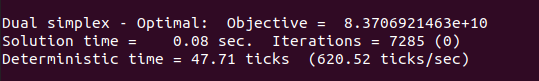

In [106]:
im500 = Image.open('cout500.png')
im500 

On importe ensuite le fichier xml

In [82]:
from bs4 import BeautifulSoup 
with open('solution4_500TWH_', 'r') as f: 
    data500 = f.read() 
    
Bs_data500 = BeautifulSoup(data500, "xml") 
b_name500 = Bs_data500.find("header")
value500 = b_name500.get('objectiveValue')
print("la valeur de la fonction objective est égale à " + str(value500) + " euros")

la valeur de la fonction objective est égale à 83706921463.394623 euros


In [83]:
c_name500 = Bs_data500.find("variables")
test500 = c_name500.find_all('variable')

In [84]:
variables500 = []
valeurs500 = []
for i in range(0,len(test500)-1):
    test_500 = test500[i]
    a500 = test_500.get('name')
    b500 = test_500.get('value')
    variables500.append(a500)
    valeurs500.append(b500)
    
df500 = pd.DataFrame(columns = ['variables' , 'valeurs'])

for i in range (0,len(test500)-1):
    df500.loc[i] = [variables500[i], valeurs500[i]]
df500

,variables,valeurs
0,g_0,75366.006245938945
1,e_0,0
2,d_0,0
3,g_1,71556.768313485387
4,e_1,0
...,...,...
26268,g_8756,0
26269,e_8756,62812.947312144956
26270,d_8756,0
26271,g_8757,0


In [85]:
#Exportation du fichier en format csv
df500.to_csv('q4_resultats_500TWH_.csv')

In [86]:
exce500 = [col for col in df500['variables'].values if 'e_' in col]
d500= pd.DataFrame(exce500,columns=['variables'])
d_exce500=d500.merge(df500)
d_exce500

,variables,valeurs
0,e_0,0
1,e_1,0
2,e_2,0
3,e_3,0
4,e_4,0
...,...,...
8753,e_8753,68799.45750945271
8754,e_8754,67051.801942969803
8755,e_8755,64135.027104029505
8756,e_8756,62812.947312144956


In [87]:
d_exce_bis500 = d_exce500[d_exce500["valeurs"] != "0"]
d_exce_bis500

,variables,valeurs
245,e_245,822.06108923258216
246,e_246,3293.7950223247171
247,e_247,4913.0578986384062
248,e_248,5648.5995108156603
249,e_249,4164.5233939762511
...,...,...
8753,e_8753,68799.45750945271
8754,e_8754,67051.801942969803
8755,e_8755,64135.027104029505
8756,e_8756,62812.947312144956


In [88]:
d_exce_bis500['valeurs'] = d_exce_bis500['valeurs'].astype(float, copy=False)

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
print("On observe un excés de prodution de " + str(d_exce_bis500['valeurs'].sum()) + " MW qui a duré " +  str(d_exce_bis500.shape[0]) + " Heures")

On observe un excés de prodution de 33436130.070349935 MW qui a duré 1473 Heures


Excés de production plus important pour 500TWH comparé à 600TWH car beaucoup d'énergie (solaire, eolien et CCGT) sont stockés du fait qu'on a une consommation moins importante

In [90]:
dele500 = [col for col in df500['variables'].values if 'g_' in col]
dbis500= pd.DataFrame(dele500,columns=['variables'])
d_dele500=dbis500.merge(df500)
d_dele500 

,variables,valeurs
0,g_0,75366.006245938945
1,g_1,71556.768313485387
2,g_2,62132.303237591848
3,g_3,63361.081885033906
4,g_4,64348.457714854478
...,...,...
8753,g_8753,0
8754,g_8754,0
8755,g_8755,0
8756,g_8756,0


In [91]:
d_dele_bis500 = d_dele500[d_dele500["valeurs"] != "0"]
d_dele_bis500['valeurs'] = d_dele_bis500['valeurs'].astype(float, copy=False)

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
print("On observe des délestages de " + str(d_dele_bis500['valeurs'].sum()) + " MW qui a duré " +  str(d_dele_bis500.shape[0]) + " Heures")

On observe des délestages de 236499875.95363104 MW qui a duré 7285 Heures


$\textbf{Pour 700 TWh}$

In [94]:
fonction_obj_fix= str(70000*c1 + 50000*c2 + 60000*c3)

##Pour les bounds : 
filename ='question4_700TWH_.lp'
with open(filename, 'a', encoding='latin-1') as f:
    f.write("Minimize\n")
    f.write('fonction_objective:') #ecriture de la fonction objective 
    f.close()

for i in range(0,data_sol_eol.shape[0]-1):
    obj_bis = "150g_" + str(i) + "+" + " 1000e_" + str(i) + "+" + " 3000d_" + str(i) + "+" #ecriture de la fonction objective
    with open(filename, 'a', encoding='latin-1') as f: 
        f.write(obj_bis)
        f.close()  
                
with open(filename, 'a', encoding='latin-1') as f:
    f.write(fonction_obj_fix) #ecriture de la fonction objective 
    f.close()
        
with open(filename, 'a', encoding='latin-1') as f:
    f.write("\nSubject To \n") #utilisation des contraintes pour la suite
    f.close()
    
#Pour la première contrainte 
for i in range(0,data_sol_eol.shape[0]-1):
    if data_sol_eol['solaire(proportion_production)'][i] < 0: #car on a des energie solaire negatives
        contrainte1 = 'g_' + str(i) + '+d_' + str(i) + '-e_' + str(i) + '=' + str(data_certitude['conso_700'][i]-(data_sol_eol['eolien(proportion_production)'][i])*c1 - (data_sol_eol['eolien(proportion_production)'][i])*c2) + '\n'
    else: 
        contrainte1 = 'g_' + str(i) + '+d_' + str(i) + '-e_' + str(i) + '=' + str(data_certitude['conso_700'][i]-(data_sol_eol['eolien(proportion_production)'][i])*c1 - (data_sol_eol['eolien(proportion_production)'][i])*c2) + '\n' 
    with open(filename, 'a',encoding='latin-1') as f:
        f.write(contrainte1)
        f.close
    
#Pour la deuxième contrainte
for i in range(0,data_sol_eol.shape[0]-1):
    contrainte2 = 'g_' + str(i)  + ' <= ' + str(c3)  + '\n'   
    with open(filename, 'a', encoding='latin-1') as f:
        f.write(contrainte2)
        f.close()   
        
##Pour les bounds : 
with open(filename, 'a', encoding='latin-1') as f:
    f.write("bounds\n")
    f.close()

        
#Pour les contraintes 6,7,8
for i in range(0,data_sol_eol.shape[0]-1):
    bounds = 'd_'+str(i)+'>=0' + '\n' + 'e_'+str(i)+'>=0' + '\n' + 'g_'+str(i)+'>=0' + '\n'
    with open(filename, 'a', encoding='latin-1') as f:
        f.write(bounds)
        f.close()             
        
#end    
with open(filename, 'a', encoding='latin-1') as f:  
    f.write('END')
    f.close()

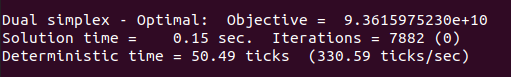

In [107]:
im700 = Image.open('cout700.png')
im700 

$\underline{ On \; importe \; le \; fichier \; xml}$  

In [95]:
from bs4 import BeautifulSoup 
with open('q4_resultats_700TWH_', 'r') as f: 
    data700 = f.read() 
    
Bs_data700 = BeautifulSoup(data700, "xml") 
b_name700 = Bs_data700.find("header")
value700 = b_name700.get('objectiveValue')
print("la valeur de la fonction objective est égale à " + str(value700) + " euros")

la valeur de la fonction objective est égale à 93615975230.360977 euros


Le coût est beaucoup plus elevé pour 700 TWH comparé à 500 TWH

In [96]:
c_name700 = Bs_data700.find("variables")
test700 = c_name700.find_all('variable')

In [97]:
variables700 = []
valeurs700 = []
for i in range(0,len(test700)-1):
    test_700 = test700[i]
    a700 = test_700.get('name')
    b700 = test_700.get('value')
    variables700.append(a700)
    valeurs700.append(b700)
    
df700 = pd.DataFrame(columns = ['variables' , 'valeurs'])

for i in range (0,len(test700)-1):
    df700.loc[i] = [variables700[i], valeurs700[i]]
df700

,variables,valeurs
0,g_0,96233
1,e_0,0
2,d_0,10704.176237980239
3,g_1,96233
4,e_1,0
...,...,...
26268,g_8756,0
26269,e_8756,41729.317523754515
26270,d_8756,0
26271,g_8757,0


In [98]:
#Exortation du fichier 
df700.to_csv('q4_resultats_700TWH_.csv')

In [99]:
exce700 = [col for col in df700['variables'].values if 'e_' in col]
d700= pd.DataFrame(exce700,columns=['variables'])
d_exce700=d700.merge(df700)
d_exce700

,variables,valeurs
0,e_0,0
1,e_1,0
2,e_2,0
3,e_3,0
4,e_4,0
...,...,...
8753,e_8753,48466.279692243086
8754,e_8754,46961.190242731573
8755,e_8755,43597.484202039355
8756,e_8756,41729.317523754515


In [100]:
d_exce_bis700 = d_exce700[d_exce700["valeurs"] != "0"]
d_exce_bis700

,variables,valeurs
800,e_800,2081.6847557333022
801,e_801,3316.8459470890521
1049,e_1049,5376.9846454975414
1050,e_1050,8363.0744378090021
1051,e_1051,3601.9594385981982
...,...,...
8753,e_8753,48466.279692243086
8754,e_8754,46961.190242731573
8755,e_8755,43597.484202039355
8756,e_8756,41729.317523754515


In [108]:
d_exce_bis700['valeurs'] = d_exce_bis700['valeurs'].astype(float, copy=False)

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
print("On observe un excés de prodution de " + str(d_exce_bis700['valeurs'].sum()) + " MW qui a duré " +  str(d_exce_bis700.shape[0]) + " Heures")

On observe un excés de prodution de 10775540.390963536 MW qui a duré 601 Heures


In [101]:
dele700 = [col for col in df700['variables'].values if 'g_' in col]
dbis700= pd.DataFrame(dele700,columns=['variables'])
d_dele700=dbis700.merge(df700)
d_dele700 

,variables,valeurs
0,g_0,96233
1,g_1,96233
2,g_2,90029.494177398781
3,g_3,91937.123954265029
4,g_4,93615.249595667643
...,...,...
8753,g_8753,0
8754,g_8754,0
8755,g_8755,0
8756,g_8756,0


In [102]:
d_dele_bis700 = d_dele700[d_dele700["valeurs"] != "0"]
d_dele_bis700['valeurs'] = d_dele_bis700['valeurs'].astype(float, copy=False)

C:\Users\na_to\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
print("On observe des délestages de " + str(d_dele_bis700['valeurs'].sum()) + " MW qui a duré " +  str(d_dele_bis700.shape[0]) + " Heures")

On observe des délestages de 411721315.45328504 MW qui a duré 8157 Heures


il peut être nécessaire d’effectuer des coupures ponctuelles
appelées délestages pour conserver l'intégrité du système électrique. 

Pour une consommation fixé à 700TWH, la situation électrique est très tendue sur le réseau électrique. on a des valeurs de délestages plus elevés que en en 500TWH. On a plus de coupures ponctuelle pour une consommation de 700TWH afin éviter un problème à plus grande échelle.

Les systèmes s'adaptent à ses consommation annuelles

Remarque: La capacité éolien est beaucoup moins importante (11761) comparé à celui de que l'on avait trouvé à la question 3 (88694). L'energie éolien peut être en grande partie lié à la cause des excés de productions.

## Comparaison excés de production deletage

In [145]:
compa_ex_del = pd.DataFrame({'deletage': [ d_dele_bis500['valeurs'].sum(), d_dele_bis700['valeurs'].sum()], 'excés de production': [d_exce_bis500['valeurs'].sum(),d_exce_bis700['valeurs'].sum()], 'consommation annuelle': [500,700]})

compa_ex_del

,deletage,excés de production,consommation annuelle
0,2.364999e+08,3.343613e+07,500
1,4.117213e+08,1.077554e+07,700


<AxesSubplot:xlabel='consommation annuelle', ylabel='excés de production'>

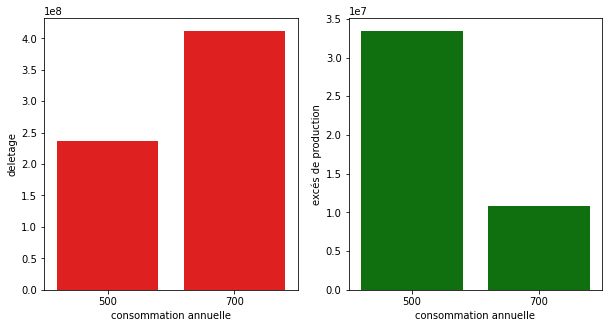

In [146]:
figure, ((ax10,ax11)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,5)

sns.barplot(data=compa_ex_del, x = 'consommation annuelle', y='deletage', ax=ax10, color ='r')
sns.barplot(data=compa_ex_del, x = 'consommation annuelle', y='excés de production', ax=ax11, color = "g")

Le délestage varie : 

    En effet, pour des consommations annuelles de 700TWH la situation électrique est plus tendue sur le réseau électrique comparé à des consommations annuelles de 500 TWH.
    Des coupures ponctuelles sont plus fréquent (pour 700TWH) pour conserver l'intégrité du système électrique. Ces coupures maitrisées sont généralement de courte durée, elle permettent d’éviter un problème à plus grande échelle.
    
L'excés de production varie : 

    En effet, lorsqu'on a des consommations annuelles moins importantes, on a beaucoup plus d'énergie (éolien, solaire et CCGT) qui sont stocké

# Question 5 – Prise en compte de plusieurs scénarios

## 1 Modéliser le problème d’optimisation stochastique à 2 étapes. L’objectif est de minimiser l’espérance du coût d’installation des capacités électriques et de fonctionnement du système dans les 3 scénarios. En 1ère étape, la décision sur les capacités de chaque actif doit être prise. En 2ème étape, le système doit satisfaire la demande dans chacun des 3 scénarios avec les capacités installées en 1ère étape.

On formule le problème :

Min $70000c_{1} + 50000c_{2} + 60000c_{3} + \frac{1}{3} (150g_{1_{i}} + 1000e_{1_{i}} +3000d_{1_{i}}) + \frac{1}{3} (150g_{2_{i}} + 1000e_{2_{i}} +3000d_{2_{i}}) + \frac{1}{3}  (150g_{3_{i}} + 1000e_{3_{i}} +3000d_{3_{i}})$

$\underline{Les \; contraintes :}$ 

$c_1 \times  profil1_i +  c_2 \times  profil2_i + g_{1_{i}} + d_{1_{i}} - e_{1_{i}} = consommation500_i$ 

$c_1 \times  profil1_i +  c_2 \times  profil2_i + g_{2_{i}} + d_{2_{i}} - e_{2_{i}} = consommation600_i$ 

$c_1 \times  profil1_i +  c_2 \times  profil2_i + g_{3_{i}} + d_{3_{i}} - e_{3_{i}} = consommation700_i$ 

$g_{1_{i}} \leq c_{3}$

$g_{2_{i}} \leq c_{3}$

$g_{3_{i}} \leq c_{3}$

$c_{1}>0$

$c_{2}>0$

$c_{3}>0$

$g_{1_{i}} \geq 0$

$g_{2_{i}} \geq 0$

$g_{3_{i}} \geq 0$

$e_{1_{i}} \geq 0$

$e_{2_{i}} \geq 0$

$e_{3_{i}} \geq 0$

$d_{1_{i}} \geq 0$

$d_{2_{i}} \geq 0$

$d_{3_{i}} \geq 0$

In [112]:
#Ecriture de la fonction objective
Objective = "70000 c1 + 50000 c2 + 60000 c3"
for i in range(0,data_sol_eol.shape[0]-1):
    Objective = Objective + " + 50gun_" + str(i) + "+" + "1000dun_" + str(i)  + "+ 333.3eun_" + str(i)  

for i in range(0,data_sol_eol.shape[0]-1):
    Objective2 = Objective + " + 50gdeux_" + str(i) + "+" + "1000ddeux_" + str(i) + "+" + "333.3edeux_"  + str(i) 

for i in range(0,data_sol_eol.shape[0]-1):
    Objective3 = Objective2 + "+ 50gtrois_" + str(i) + "+" + "1000dtrois_" + str(i) + "+" + "333.3etrois_"  + str(i)  
          
    
filename ='q5.lp'
with open(filename, 'a', encoding='latin-1') as f:
    f.write("Minimize\n")
    f.write('Obj:')
    f.write(Objective3)
    f.write("\nSubject To \n")
    f.close()
    
#ecriture des contraintes    
for i in range(0,data_sol_eol.shape[0]-1):
    contrainte1 =   'gun_' + str(i) + '-c3 <= 0'   + '\n' 
    with open(filename, 'a', encoding='latin-1') as f:
        
        f.write(contrainte1)
        f.close()


for i in range(0,data_sol_eol.shape[0]-1):
    contrainte2 =   'gdeux_' + str(i) + '-c3 <= 0'   + '\n' 
    with open(filename, 'a', encoding='latin-1') as f:
        
        f.write(contrainte2)
        f.close()
        
for i in range(0,data_sol_eol.shape[0]-1):
    contrainte3 =   'gtrois_' + str(i) + '-c3 <= 0'   + '\n' 
    with open(filename, 'a', encoding='latin-1') as f:
        
        f.write(contrainte3)
        f.close()        

   
               
               
#Pour la première contrainte 
for i in range(0,data_sol_eol.shape[0]-1):
    if data_sol_eol['solaire(proportion_production)'][i] < 0: #car on a des energie solaire negatives
        contrainte4 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 ' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + gun_' + str(i) + '+dun_' + str(i) + '-eun_' + str(i) + '=' +str(data_bis['conso_500'][i]) + '\n'       
    else: 
        contrainte4 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 +' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + gun_' + str(i) + '+dun_' + str(i) + '-eun_' + str(i) + '=' +str(data_bis['conso_500'][i]) + '\n' 
    with open(filename, 'a',encoding='latin-1') as f:
        f.write(contrainte4)
        f.close       

for i in range(0,data_sol_eol.shape[0]-1):
    if data_sol_eol['solaire(proportion_production)'][i] < 0: #car on a des energie solaire negatives
        contrainte5 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 ' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + gdeux_' + str(i) + '+ddeux_' + str(i) + '-edeux_' + str(i) + '=' +str(data_bis['conso_600'][i]) + '\n'       
    else: 
        contrainte5 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 +' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + gdeux_' + str(i) + '+ddeux_' + str(i) + '-edeux_' + str(i) + '=' +str(data_bis['conso_600'][i]) + '\n' 
    with open(filename, 'a',encoding='latin-1') as f:
        f.write(contrainte5)
        f.close   
        
for i in range(0,data_sol_eol.shape[0]-1):
    if data_sol_eol['solaire(proportion_production)'][i] < 0: #car on a des energie solaire negatives
        contrainte6 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 ' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + gtrois_' + str(i) + '+dtrois_' + str(i) + '-etrois_' + str(i) + '=' +str(data_bis['conso_700'][i]) + '\n'       
    else: 
        contrainte6 = str((data_sol_eol['eolien(proportion_production)'][i]))  + 'c1 +' + str((data_sol_eol['solaire(proportion_production)'][i])) + 'c2 + gtrois_' + str(i) + '+dtrois_' + str(i) + '-etrois_' + str(i) + '=' +str(data_bis['conso_700'][i]) + '\n' 
    with open(filename, 'a',encoding='latin-1') as f:
        f.write(contrainte6)
        f.close 
               
with open(filename, 'a', encoding='latin-1') as f:
    f.write("Bounds\n")
    f.close()

    
    
    
    
for i in range(0,data_sol_eol.shape[0]-1):
    bounds1 = 'dun_'+str(i)+'>=0' + '\n' + 'eun_' + str(i) + '>=0' + '\n' + 'gun_'+str(i)+'>=0' + '\n'
    with open(filename, 'a', encoding='latin-1') as f:
        
        f.write(bounds1)
        f.close()

for i in range(0,data_sol_eol.shape[0]-1):
    bounds2 = 'ddeux_'+str(i)+'>=0' + '\n' + 'edeux_'+ str(i) +'>=0' + '\n' +  'gdeux_'+str(i)+'>=0' + '\n'
    with open(filename, 'a', encoding='latin-1') as f:
        
        f.write(bounds2)
        f.close()
  

        
for i in range(0,data_sol_eol.shape[0]-1):
    bounds3 = 'dtrois_'+str(i)+'>=0' + '\n' + 'etrois_' + str(i) + '>=0' + '\n' + 'gtrois_'+str(i) +'>=0' + '\n'
    with open(filename, 'a', encoding='latin-1') as f:
        
        f.write(bounds3)
        f.close()   
  

    
bounds4 = 'c1 >=0' + '\n' + 'c2>=0' + '\n' + 'c3>=0' + '\n'  

with open(filename, 'a', encoding='latin-1') as f:
    
    f.write(bounds4)
    f.write('END')
    f.close()

On a minimisé l’espérance du coût d’installation des capacités électriques et de fonctionnement du système dans les 3 scénarios.
Après avoir résolu le probleme sur CPLEX, on importe le fichier de format XML

Comment les capacités installées évoluent-elles ? Pourquoi ?

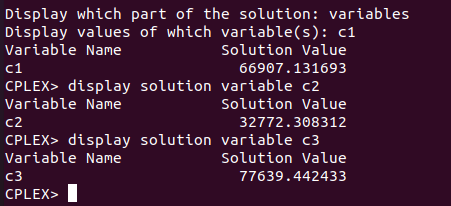

In [122]:
imq5 = Image.open('solutionq5.png')
imq5

En prenant en compte les 3 scénarios
    
    Le mix électrique avec les valeurs de capacités optimales sont : 
        c1 (éolien) = 66907
        c2 (solaire) = 32772
        c3 (CCGT) = 77639
        
On observe que comparé à la question 3, les valeurs des capacités éoliens, solaires et CCGT sont moins elevés lorsqu'on prend en compte les différents scénario de demande dans l’optimisation. En fixant ses résultats on a un mix électrique pouvant s’adapter à plusieurs futurs possibles.

In [152]:
from bs4 import BeautifulSoup 
with open('solution_q5', 'r') as f: 
    data5= f.read() 
    
Bs_data5 = BeautifulSoup(data5, "xml") 
b_name5 = Bs_data5.find("header")
value5 = b_name5.get('objectiveValue')
print("la valeur de la fonction objective est égale à " + str(value5) + " euros")

la valeur de la fonction objective est égale à 27438037255.620716 euros


In [153]:
c_name5 = Bs_data5.find("variables")
test5 = c_name5.find_all('variable')

In [154]:
variables5 = []
valeurs5 = []
for i in range(0,len(test5)-1):
    test_5 = test5[i]
    a5 = test_5.get('name')
    b5 = test_5.get('value')
    variables5.append(a5)
    valeurs5.append(b5)
    
df5 = pd.DataFrame(columns = ['variables' , 'valeurs'])

for i in range (0,len(test5)-1):
    df5.loc[i] = [variables5[i], valeurs5[i]]
df5

,variables,valeurs
0,c1,66907.131693016636
1,c2,32772.308312280125
2,c3,77639.442432678814
3,gun_0,77288.728342740695
4,dun_0,0
...,...,...
78819,dtrois_8754,16191.11021501207
78820,etrois_8754,0
78821,dtrois_8755,18585.920310253972
78822,etrois_8755,0


In [155]:
#Exportation du fichier en format csv
df5.to_csv('q5_resultats_scenario.csv')